### 0.检查基本库

In [33]:
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


### 1.获取学习数据

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 2.测试数据

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

### 3.图像颜色值转为0~1之间的数

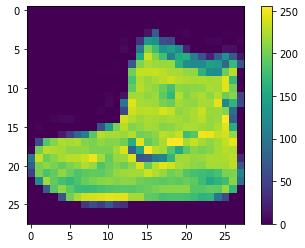

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

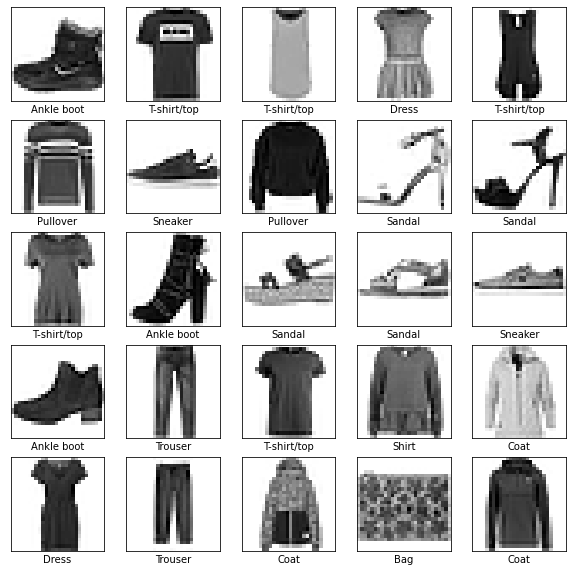

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 4.构建模型

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### 5.编辑模型

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
# 显示模型的结构
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 6.训练模型

In [40]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
print(checkpoint_dir)

# 创建一个保存模型权重的回调
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

training_1


In [41]:
model.fit(
          train_images, 
          train_labels, 
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback]
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1385 - accuracy: 0.9475 - val_loss: 0.4038 - val_accuracy: 0.8934

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1360 - accuracy: 0.9486 - val_loss: 0.4236 - val_accuracy: 0.8868

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1328 - accuracy: 0.9499 - val_loss: 0.4110 - val_accuracy: 0.8922

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1305 - accuracy: 0.9498 - val_loss: 0.4189 - val_accuracy: 0.8914

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1264 - accuracy: 0.9520 - val_loss: 0.4167 - val_accuracy: 0.8912

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/10
1875/1875 [=============

### 7. 评估准确率

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Untrained model, accuracy: {:5.2f}%".format(100*test_acc))

313/313 - 0s - loss: 0.4553 - accuracy: 0.8922
Untrained model, accuracy: 89.22%


In [44]:
# 加载权重
model.load_weights(checkpoint_path)

# 重新评估模型
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*test_acc))

313/313 - 0s - loss: 0.4553 - accuracy: 0.8922
Restored model, accuracy: 89.22%


### 8.做出预测

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([8.2617260e-07, 1.6827780e-09, 6.3778987e-07, 6.9284937e-07,
       6.9245971e-07, 1.9414957e-04, 3.2659809e-06, 4.0834013e-02,
       6.5877902e-07, 9.5896500e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

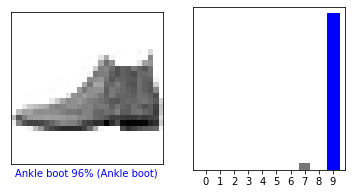

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

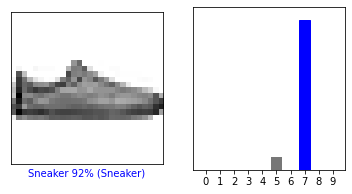

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

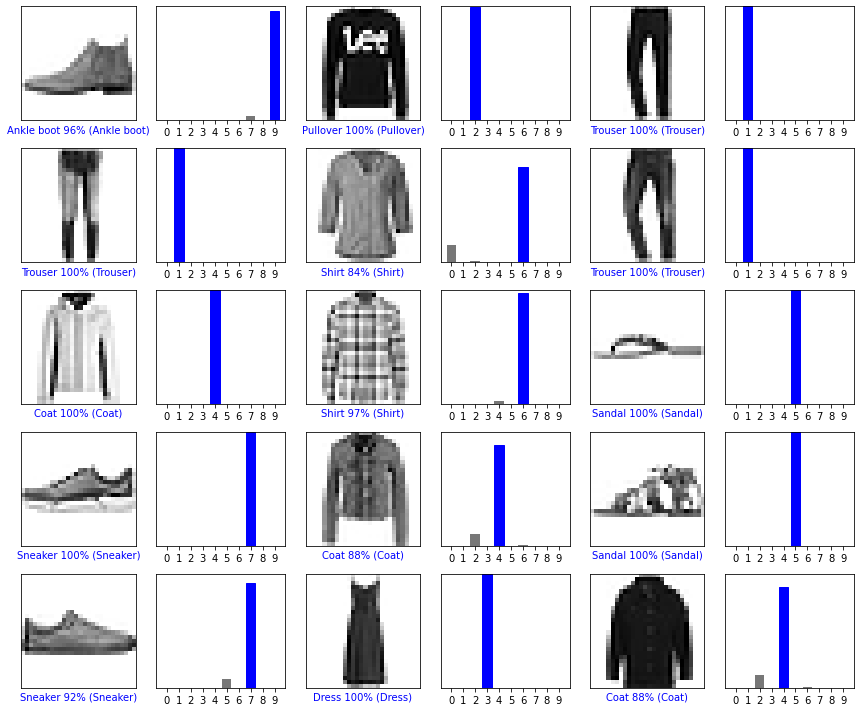

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 9.使用训练好的模型

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.8501270e-05 6.0514007e-13 9.9882919e-01 3.0949215e-11 1.1031864e-03
  2.9844013e-14 4.9169030e-05 4.5055439e-17 1.7480737e-09 2.9420968e-18]]


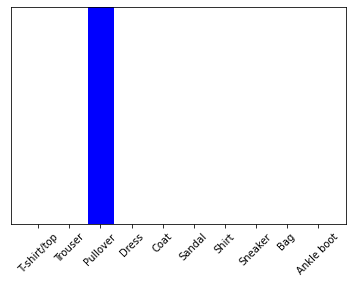

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

2